## Question No 2

For this problem you will experiment with various classifiers provided as part of the scikit-learn (sklearn) machine learning module, as well as with some of its preprocessing and model evaluation capabilities.  [Note: This module is already part of the Anaconda distributions. However, if you are using standalone Python distributions, you will need to first obtain and install it]. You will work with a modified subset of a real data set of customers for a bank. This is the same data set used in Assignment 1. The data is provided in a CSV formatted file with the first row containing the attribute names. The description of the the different fields in the data are provided in this document.

In [1]:
import pandas as pd
import numpy as np
import os 
os.chdir('E:/OneDrive/MSPA/CSC 478/Assignment/Assignment 2')

## Part a

Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split)

In [2]:
df_bank = pd.read_csv('bank_data.csv', index_col= 0)
df_bank.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [3]:
#Renaming the columns
name = ['Age', 'Income', 'Children', 'Gender', 'Region', 'Married', 'Car', 'Savings_Accounts',
        'Current_Accounts', 'Mortgage', 'PEP']
df_bank.columns =  name
df_bank.columns
# Checking the shape of the file
df_bank.shape

(600, 11)

Random Reshuffling of the data

In [4]:
df_bank = df_bank.reindex(np.random.permutation(df_bank.index))
df_bank.head()

,Age,Income,Children,Gender,Region,Married,Car,Savings_Accounts,Current_Accounts,Mortgage,PEP
id,,,,,,,,,,,
ID12659,38,31290.6,0,FEMALE,SUBURBAN,YES,NO,YES,YES,NO,NO
ID12203,42,15499.9,0,MALE,INNER_CITY,YES,YES,NO,YES,YES,YES
ID12319,39,31693.5,0,MALE,TOWN,NO,YES,YES,NO,NO,YES
ID12324,67,43530.0,0,FEMALE,INNER_CITY,YES,NO,YES,YES,YES,NO
ID12666,30,24867.6,0,MALE,TOWN,YES,YES,YES,NO,NO,NO


In [5]:
df_bank.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,600,NaN,NaN,NaN,42.395,14.4249,18,30,42,55.25,67
Income,600,NaN,NaN,NaN,27524,12899.5,5014.21,17264.5,24925.3,36172.7,63130.1
Children,600,NaN,NaN,NaN,1.01167,1.05675,0,0,1,2,3
Gender,600,2,MALE,300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,600,4,INNER_CITY,269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,600,2,YES,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Car,600,2,NO,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Savings_Accounts,600,2,YES,414,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Accounts,600,2,YES,455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,600,2,NO,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Verifying if there are any missing values or not 
#Apparently not
df_bank.isnull().sum()

Age                 0
Income              0
Children            0
Gender              0
Region              0
Married             0
Car                 0
Savings_Accounts    0
Current_Accounts    0
Mortgage            0
PEP                 0
dtype: int64

Splitting the target variable

In [7]:
bank_target = df_bank.PEP
bank_target.head()

id
ID12659     NO
ID12203    YES
ID12319    YES
ID12324     NO
ID12666     NO
Name: PEP, dtype: object

Creating data into Standard Spreadsheet Format

In [8]:
bank_data = df_bank.ix[:,'Age':'Mortgage']
bank_data.head()

,Age,Income,Children,Gender,Region,Married,Car,Savings_Accounts,Current_Accounts,Mortgage
id,,,,,,,,,,
ID12659,38,31290.6,0,FEMALE,SUBURBAN,YES,NO,YES,YES,NO
ID12203,42,15499.9,0,MALE,INNER_CITY,YES,YES,NO,YES,YES
ID12319,39,31693.5,0,MALE,TOWN,NO,YES,YES,NO,NO
ID12324,67,43530.0,0,FEMALE,INNER_CITY,YES,NO,YES,YES,YES
ID12666,30,24867.6,0,MALE,TOWN,YES,YES,YES,NO,NO


In [9]:
bank_data = pd.get_dummies(df_bank[['Age', 'Income', 'Children', 'Gender', 'Region', 'Married', 'Car', 
                                    'Savings_Accounts', 'Current_Accounts','Mortgage']])
# Checking the shape of the file
print bank_data.shape
# Checking the first five values of the data
bank_data.head()

(600, 19)


,Age,Income,Children,Gender_FEMALE,Gender_MALE,Region_INNER_CITY,Region_RURAL,Region_SUBURBAN,Region_TOWN,Married_NO,Married_YES,Car_NO,Car_YES,Savings_Accounts_NO,Savings_Accounts_YES,Current_Accounts_NO,Current_Accounts_YES,Mortgage_NO,Mortgage_YES
id,,,,,,,,,,,,,,,,,,,
ID12659,38,31290.6,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
ID12203,42,15499.9,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
ID12319,39,31693.5,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
ID12324,67,43530.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
ID12666,30,24867.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


Divide the data into Training and Testing Set, 80% and 20% respectively 

In [10]:
tpercent = 0.8
tsize = int(np.floor(tpercent *len(bank_data)))
bank_train = bank_data.iloc[:tsize,:]
bank_test = bank_data.iloc[tsize:,:]

# Checking the shape of the file
print bank_train.shape
print bank_test.shape

(480, 19)
(120, 19)


Doing the same thing for the Target Variable

In [11]:
bank_target_train = bank_target[0:int(tsize)]
bank_target_test = bank_target[int(tsize):len(bank_data)]

print bank_target_train.shape
print bank_target_test.shape

(480L,)
(120L,)


## Part b.
Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best)

In [12]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(bank_train)

In [13]:
bank_train_norm = min_max_scaler.fit_transform(bank_train) 
bank_test_norm = min_max_scaler.fit_transform(bank_test)

In [14]:
np.set_printoptions(precision=2, linewidth=80)
bank_test_norm[0:4]

array([[ 0.06,  0.02,  0.33,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ],
       [ 0.42,  0.25,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ],
       [ 0.1 ,  0.14,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ,  1.  ,  0.  ],
       [ 0.19,  0.05,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  1.  ,  1.  ,  0.  ]])

For consistency, the target variables are also converted into array

In [86]:
bank_target_train = np.array(bank_target_train)
bank_target_test = np.array(bank_target_test)

In [15]:
from sklearn import neighbors, tree, naive_bayes

In [16]:
n_neighbors = 8
knnclf = neighbors.KNeighborsClassifier(n_neighbors , weights = 'distance')
knnclf.fit(bank_train_norm, bank_target_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='distance')

In [17]:
knnpreds_test = knnclf.predict(bank_test_norm)

For Classification Matrix & Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
print classification_report(bank_target_test, knnpreds_test)

             precision    recall  f1-score   support

         NO       0.83      0.76      0.79        75
        YES       0.65      0.73      0.69        45

avg / total       0.76      0.75      0.75       120



In [19]:
from sklearn.metrics import confusion_matrix

knn_conf_mat = confusion_matrix(bank_target_test, knnpreds_test)
knn_conf_mat

array([[57, 18],
       [12, 33]])

Visualizing Confusion Matrix using Matplotlib

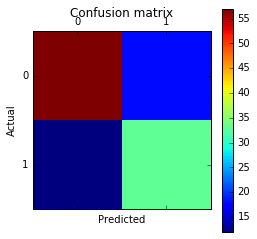

In [20]:
import pylab as plt
%matplotlib inline
plt.matshow(knn_conf_mat)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
#Average Accuracy across the test instances
print 'The Average Accuracy for the Testing Set is: %0.2f Percent' % (knnclf.score(bank_test_norm, bank_target_test)*100)

The Average Accuracy for the Testing Set is: 75.00 Percent


In [22]:
# Check for underfitting or overfitting
print 'The Average Accuracy for the Training Set is: %0.2f Percent' % (knnclf.score(bank_train_norm, bank_target_train)*100)

The Average Accuracy for the Training Set is: 100.00 Percent


In [23]:
neighbor_list = [2,4,6,8,10,12,14,16,18]
weight_list = ['distance', 'uniform']
dist_dict ={}
uni_dict ={}

for weight in weight_list:
        for neighbor in neighbor_list:
            knnclf = neighbors.KNeighborsClassifier(neighbor , weight)
            knnclf.fit(bank_train_norm, bank_target_train)
            knnpreds_test = knnclf.predict(bank_test_norm)
            accuracy = np.around((knnclf.score(bank_test_norm, bank_target_test)*100), 2)
            if weight == 'distance':
                dist_dict[neighbor] = dist_dict.get(neighbor, accuracy)
            else:
                uni_dict[neighbor] = uni_dict.get(neighbor, accuracy)


In [24]:
from collections import defaultdict
compl_dict = defaultdict(list)

for d in (dist_dict, uni_dict): # you can list as many input dicts as you want here
    for key, value in d.iteritems():
        compl_dict[key].append(value)
        
df_both = pd.DataFrame(compl_dict.values(), index = compl_dict.keys(), columns = ['Distance', 'Uniform'])
df_both

,Distance,Uniform
2,70.83,73.33
4,75.83,75.00
6,73.33,72.50
8,75.00,73.33
10,75.83,77.50
12,75.83,78.33
14,75.00,75.00
16,70.83,71.67
18,71.67,71.67


## Analysis for Different Parameters

Based on the different values of neighbors and distances, we can see that the highest accuracy is 78.00% which is achieved when k = 12, metrics = Uniform. Similarly when the metric was 'distance', the highest accuracy was 75.83% when k = 4, 10, 12.

## Part c

Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

In [27]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(bank_train, bank_target_train)
treepreds_test = treeclf.predict(bank_test)

In [28]:
print 'The Accuracy using Decision Tree on Testing Set is %0.2f Percent' % (treeclf.score(bank_test, bank_target_test)*100)

The Accuracy using Decision Tree on Testing Set is 80.00 Percent


In [29]:
print 'The Accuracy using Decision Tree on the Training Set is %0.2f Percent' %(treeclf.score(bank_train, bank_target_train)*100)

The Accuracy using Decision Tree on the Training Set is 98.96 Percent


In [30]:
print(classification_report(bank_target_test, treepreds_test))

             precision    recall  f1-score   support

         NO       0.84      0.84      0.84        75
        YES       0.73      0.73      0.73        45

avg / total       0.80      0.80      0.80       120



In [31]:
treecm = confusion_matrix(bank_target_test, treepreds_test)
print treecm

[[63 12]
 [12 33]]


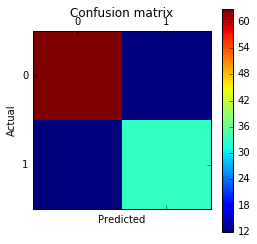

In [32]:
import pylab as plt
%matplotlib inline
plt.matshow(treecm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Using Naive Bayes Classifier

In [36]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(bank_train, bank_target_train)
nbpreds_test = nbclf.predict(bank_test)

In [39]:
print 'The Accuracy score on the Testing set using Naive Bayes is %0.2f Percent' % (nbclf.score(bank_test, bank_target_test)*100)

The Accuracy score on the Testing set using Naive Bayes is 73.33 Percent


In [40]:
print 'The Accuracy score on the Training set using Naive Bayes is %0.2f Percent' % (nbclf.score(bank_train, bank_target_train)*100)

The Accuracy score on the Training set using Naive Bayes is 63.75 Percent


In [41]:
cr_nb = classification_report(bank_target_test,nbpreds_test)
print cr_nb

             precision    recall  f1-score   support

         NO       0.77      0.81      0.79        75
        YES       0.66      0.60      0.63        45

avg / total       0.73      0.73      0.73       120



In [42]:
nbcm = confusion_matrix(bank_target_test, nbpreds_test)
print nbcm

[[61 14]
 [18 27]]


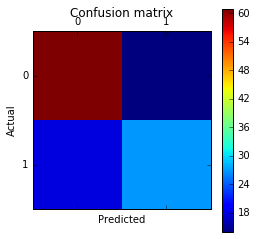

In [43]:
import pylab as plt
%matplotlib inline
plt.matshow(nbcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

- Based on the accuracy score using KNN Classifier, we can see that the accuracy score for both training and testing are very far from one another, which indicates High Variance and Low Bias or in other words the model is overfitting.

- Based on the accuracy score using Decision Tree Classifier, we can see that the accuracy score for both training and testing are very far from one another, which indicates High Variance and Low Bias or in other words the model is overfitting.

- Based on the accuracy score using Naive Bayes, we can see that the accuracy score for training set is less than the testing set, which indicates Low Variance and High Bias hence there is underfitting in the data 

## Part d

Based on the results that we have got using different classifier, we can see that the Decision Tree performs better on the testing set, eventhough the model seems to overfit the training set. 

In addition, linear methods Naive Bayes have high bias for nonlinear problems because they can only
model one type of class boundary (a linear hyperplane) and low variance because most randomly drawn
training sets produce similar decision hyperplanes; however, nonlinear methods like kNN have low bias
and high variance. High-variance learning methods are prone to over-fitting the train data. Since learning
error includes both bias and variance, we know there is not a learning method that is optimal among all
text classification problems because there is always a tradeoff between bias and variance.